In [ ]:
import numpy as np 
import pandas as pd
import plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode



init_notebook_mode(connected = True)
import seaborn as sns
import time

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

pd.set_option('display.max_columns', None)


In [ ]:
teleusers = pd.read_csv(r'/content/drive/MyDrive/Telcom-Customer-Churndata.csv')
teleusers.shape

(7043, 21)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
teleusers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
teleusers.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
teleusers.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
#Review dataset's basic overview of numerical attributes
teleusers.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


SeniorCitizen is a categorical feature,so percentile distribution is not proper.
75 percentile telecom customer have tenure <55 months.
Mean of Monthly charges is 64.76 US Dollars but 75 percentile customers pays more than 89 Dollars.

In [ ]:
#Review dataset's basic overview of categorical attributes
teleusers.describe(include='O').transpose()

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


**Column Type Casting**

Here TotalCharges column is recognized by pandas as object instead of float

In [ ]:
#Casting TotalCharges column to Float
teleusers['TotalCharges'] = pd.to_numeric(teleusers['TotalCharges'], errors='coerce')
teleusers['TotalCharges'].head()

0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: float64

In [ ]:
teleusers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#check if there is any null values
teleusers.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
# Find Missing Values
(teleusers['TotalCharges'].values == ' ')

False

In [ ]:
#Prints rows having missing values
teleusers.loc[teleusers ['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
# Delete unnecessary columns,
teleusers = teleusers.drop(['customerID', 'TotalCharges'], axis = 1)

In [ ]:
teleusers.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


**Correlation between "Quantitative variables"**

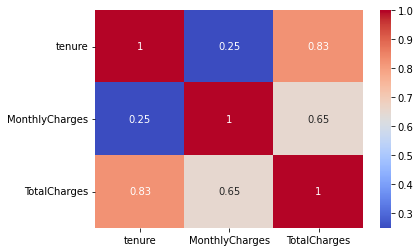

In [ ]:
sns.heatmap(data=teleusers[['tenure', 'MonthlyCharges','TotalCharges']].corr(),
            annot=True, cmap='coolwarm');

**Inference**: As evident from the correlation matrix, 'totalcharges' is the total monthly charges over the tenure of a customer, 'totalcharges' is highly correlated with 'MonthlyCharges' and 'tenure'.

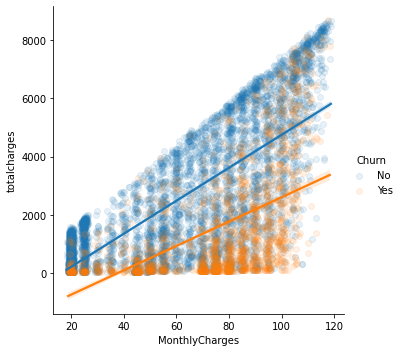

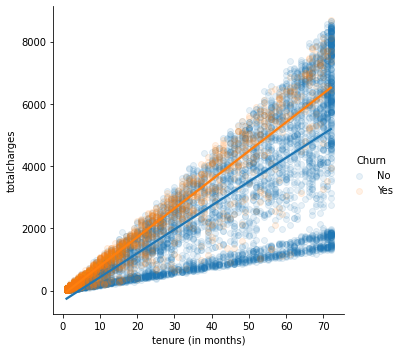

In [ ]:
sns.lmplot('MonthlyCharges', 'totalcharges', data=teleusers, hue='Churn',
           scatter_kws={'alpha': 0.1})
fig = sns.lmplot('tenure', 'totalcharges', data=teleusers, hue='Churn',
                 scatter_kws={'alpha': 0.1})
fig.set_xlabels('tenure (in months)');

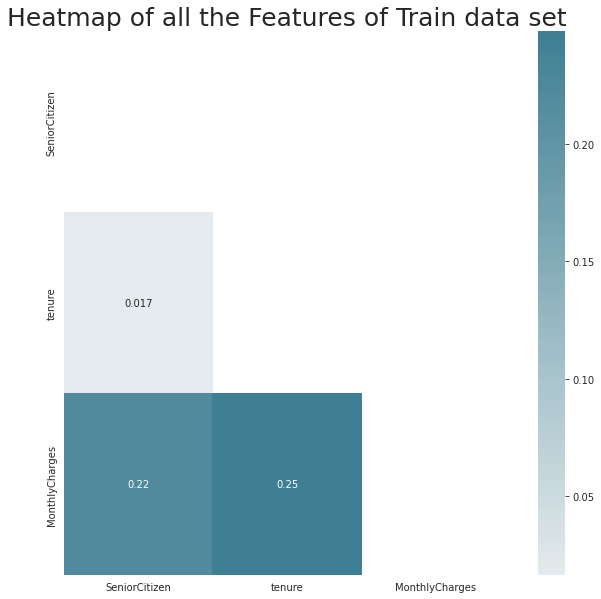

In [ ]:
import matplotlib.style as style
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (10,10))
## Plotting heatmap. Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(teleusers.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(teleusers.corr(), cmap=sns.diverging_palette(20, 220, n=200), annot=True, mask=mask, center = 0, );
plt.title("Heatmap of all the Features of Train data set", fontsize = 25);

In [ ]:
teleusers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


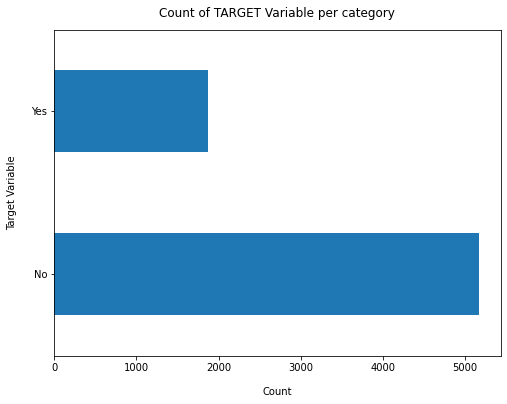

In [ ]:
teleusers['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [ ]:
#Count of churned and non churned users
churn = teleusers.groupby('Churn').agg({'Churn': 'count'}).rename(columns = {'Churn': 'count'}).reset_index()
churn

,Churn,count
0,No,5174
1,Yes,1869


In [ ]:
100*teleusers['Churn'].value_counts()/len(teleusers['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

Ratio of the dataset is 73:27 ie,The dataset is highly imbalanced

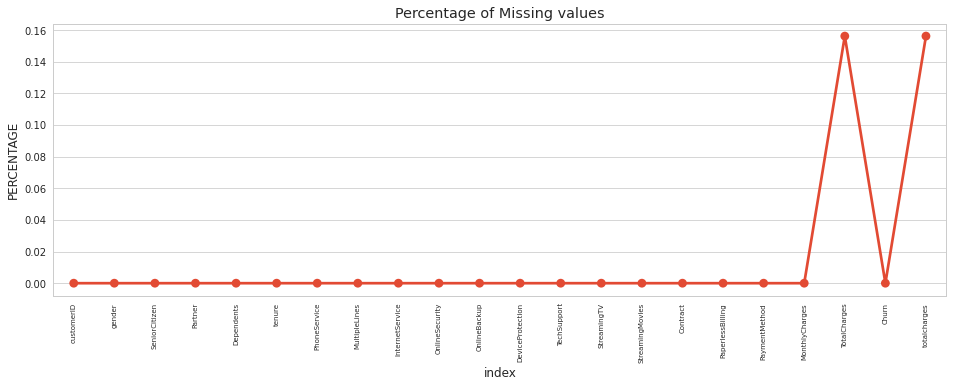

In [ ]:
missing = pd.DataFrame((teleusers.isnull().sum())*100/teleusers.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [ ]:
cat_cols = teleusers.select_dtypes(include = ['object']).columns.to_list()
for col in cat_cols:
    print(col)
    print(teleusers.groupby([col, 'Churn']).size())

gender
gender  Churn
Female  No       2549
        Yes       939
Male    No       2625
        Yes       930
dtype: int64
Partner
Partner  Churn
No       No       2441
         Yes      1200
Yes      No       2733
         Yes       669
dtype: int64
Dependents
Dependents  Churn
No          No       3390
            Yes      1543
Yes         No       1784
            Yes       326
dtype: int64
PhoneService
PhoneService  Churn
No            No        512
              Yes       170
Yes           No       4662
              Yes      1699
dtype: int64
MultipleLines
MultipleLines     Churn
No                No       2541
                  Yes       849
No phone service  No        512
                  Yes       170
Yes               No       2121
                  Yes       850
dtype: int64
InternetService
InternetService  Churn
DSL              No       1962
                 Yes       459
Fiber optic      No       1799
                 Yes      1297
No               No       1413
         

In [ ]:
fig = px.pie(churn, values = churn['count'], names = Churn['Churn'])
fig.update_traces(textposition = 'inside', 
                  textinfo = 'percent + label', 
                  hole = 0.85, 
                  marker = dict(colors = ['#2A3132','#336B87'], line = dict(color = 'blue', width = 2)))

fig.update_layout(title_text = 'Customer churn', title_x = 0.5, title_y = 0.53, title_font_size = 32, title_font_family = 'Calibri', title_font_color = 'black',
                  showlegend = False)
                  
fig.show()

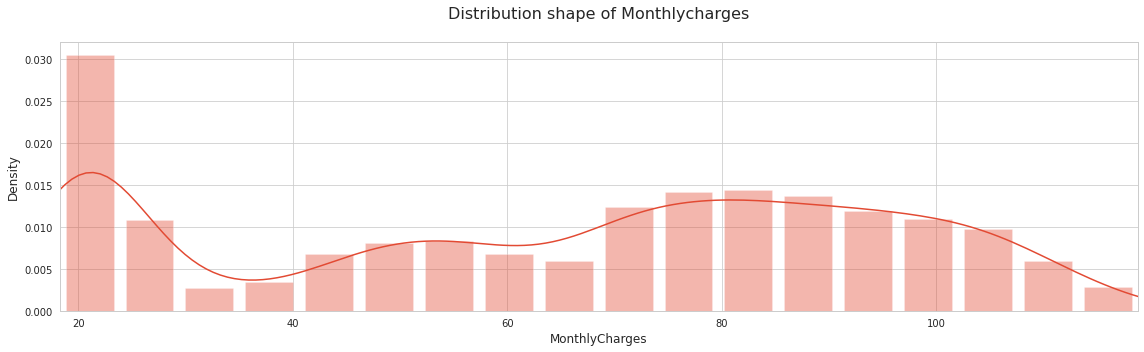

In [ ]:
#Distribution and skewness of Monthly Charges

plt.figure(figsize=(16,5))
sns.distplot(teleusers['MonthlyCharges'], hist_kws={"rwidth": 0.8})
plt.xlim(teleusers['MonthlyCharges'].min(), teleusers['MonthlyCharges'].max())
plt.title(f"Distribution shape of {'MonthlyCharges'.capitalize()}\n", fontsize=16)
plt.tight_layout()
plt.show()

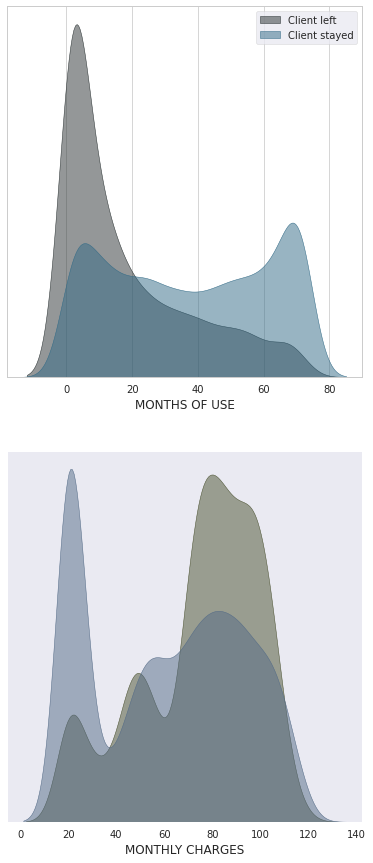

In [ ]:
fig = plt.figure(figsize = (14, 15))

plt.subplot(221)
sns.set_style("dark")
sns.kdeplot(teleusers.query('Churn == "Yes"')['tenure'], color = '#2A3132', shade = True, label = 'Client left', alpha = 0.5)
sns.kdeplot(teleusers.query('Churn == "No"')['tenure'], color = '#336B87', shade = True, label = 'Client stayed', alpha = 0.5)
plt.ylabel('')
plt.xlabel('MONTHS OF USE')
plt.yticks([])
plt.legend()



plt.subplot(223)
sns.set_style("dark")
sns.kdeplot(teleusers.query('Churn == "Yes"')['MonthlyCharges'], color = '#4A5130', shade = True, label = 'Client left', alpha = 0.5)
sns.kdeplot(teleusers.query('Churn == "No"')['MonthlyCharges'], color = '#546B87', shade = True, label = 'Client stayed', alpha = 0.5)
plt.ylabel('')
plt.xlabel('MONTHLY CHARGES')
plt.yticks([])


plt.show()

In [ ]:
#Affect of having a spouse and retirement on customer churn
spouse = teleusers.groupby(['Partner', 'Churn']).agg({'Churn': 'count'}).rename(columns = {'Churn': 'count'}).reset_index()
spouse.iloc[[0,1], 0] = 'Not married'
spouse.iloc[[2,3], 0] = 'Married'
spouse

,Partner,Churn,count
0,Not married,No,2441
1,Not married,Yes,1200
2,Married,No,2733
3,Married,Yes,669


In [ ]:
SeniorCitizen = teleusers.groupby(['SeniorCitizen', 'Churn']).agg({'Churn': 'count'}).rename(columns = {'Churn': 'count'}).reset_index()
SeniorCitizen.iloc[[0,1], 0] = 'Not pensioner'
SeniorCitizen.iloc[[2,3], 0] = 'Pensioner'
SeniorCitizen

,SeniorCitizen,Churn,count
0,Not pensioner,No,4508
1,Not pensioner,Yes,1393
2,Pensioner,No,666
3,Pensioner,Yes,476


In [ ]:

X = teleusers.drop('Churn', axis = 1)
rey = {'No': 0, 'Yes': 1}
teleusers['Churn'] = teleusers['Churn'].map(rey)
y = teleusers['Churn']

num_cols = ['tenure', 'MonthlyCharges']
cat_cols = X.select_dtypes(include = ['object']).columns.to_list()

In [ ]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70


In [ ]:
def label_encoder(df):
    for i in cat_cols:
        le = LabelEncoder()
        df[i] = le.fit_transform(df[i])
    return df

In [ ]:
teleusers = label_encoder(teleusers)
teleusers.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,1


In [ ]:
corrMatrix = teleusers.corr().abs()['Churn'].sort_values(ascending=False)
corrMatrix

Churn               1.000000
Contract            0.396713
tenure              0.352229
OnlineSecurity      0.289309
TechSupport         0.282492
OnlineBackup        0.195525
MonthlyCharges      0.193356
PaperlessBilling    0.191825
DeviceProtection    0.178134
Dependents          0.164221
SeniorCitizen       0.150889
Partner             0.150448
PaymentMethod       0.107062
InternetService     0.047291
StreamingMovies     0.038492
MultipleLines       0.038037
StreamingTV         0.036581
PhoneService        0.011942
gender              0.008612
Name: Churn, dtype: float64

In [ ]:
# Remove the attribures having less correlation with Churn
teleusers.drop(['PhoneService', 'gender'],inplace=True,axis=1)

In [ ]:
teleusers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   int64  
 2   Dependents        7043 non-null   int64  
 3   tenure            7043 non-null   int64  
 4   MultipleLines     7043 non-null   int64  
 5   InternetService   7043 non-null   int64  
 6   OnlineSecurity    7043 non-null   int64  
 7   OnlineBackup      7043 non-null   int64  
 8   DeviceProtection  7043 non-null   int64  
 9   TechSupport       7043 non-null   int64  
 10  StreamingTV       7043 non-null   int64  
 11  StreamingMovies   7043 non-null   int64  
 12  Contract          7043 non-null   int64  
 13  PaperlessBilling  7043 non-null   int64  
 14  PaymentMethod     7043 non-null   int64  
 15  MonthlyCharges    7043 non-null   float64
 16  Churn             7043 non-null   int64  


In [ ]:
#Standardisation
sc = StandardScaler()
X[num_cols] = sc.fit_transform(X[num_cols])

# Label encoding
X = label_encoder(X)

X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,0,0,1,0,-1.277445,0,1,0,0,2,0,0,0,0,0,1,2,-1.160323
1,1,0,0,0,0.066327,1,0,0,2,0,2,0,0,0,1,0,3,-0.259629
2,1,0,0,0,-1.236724,1,0,0,2,2,0,0,0,0,0,1,3,-0.362660
3,1,0,0,0,0.514251,0,1,0,2,0,2,2,0,0,1,0,0,-0.746535
4,0,0,0,0,-1.236724,1,0,1,0,0,0,0,0,0,0,1,2,0.197365


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train_OverSampled, y_train_OverSampled = oversample.fit_resample(X_train, y_train)

In [ ]:
y_train_OverSampled.value_counts()

1    4157
0    4157
Name: Churn, dtype: int64

In [ ]:
from imblearn.under_sampling import NearMiss
# define the undersampling method
undersample = NearMiss(version=1, n_neighbors=3)
# transform the dataset
X_train_UnderSampled, y_train_UnderSampled = undersample.fit_resample(X_train, y_train)

In [ ]:
def FeatureImportance(model, X_train):
    f_imp = pd.DataFrame(columns = ['feature', 'importance'], index = range(18))
    for i in range(len(f_imp.index)):
        f_imp.iloc[i, 0] = X_train.columns.to_list()[i]
    
    f_imp['importance'] = model.feature_importances_
    f_imp = f_imp.sort_values('importance', ascending = False)
    print(f_imp)

## Models with Default Hyperparameter Values

In [ ]:
def Evaluate_Model(model_name,model_clf,data_type,X_train,y_train,X_test,y_test):
    print('Model ',model_name)
    print('Data ', data_type)
    start = time.time()
    model = model_clf.fit(X_train,y_train)
    end = time.time()
    training_time = end-start
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]
    cm = confusion_matrix(y_test, y_pred)

    print(classification_report(y_test, y_pred))
    
    AUC_test = round(roc_auc_score(y_test, y_prob), 3)
    Recall_test = round(recall_score(y_test, y_pred), 2)
    Precision_test = round(precision_score(y_test, y_pred),2)
    f1_Score_test = round(f1_score(y_test, y_pred),2)
    
    print(f'ROC AUC Test set score: {AUC_test}')
    print(f'Recall Test set score: {Recall_test}')
    print(f'Precision Test set score: {Precision_test}')
    print(f'f1 Score Test set : {f1_Score_test}')
    print('')
    print('-----------------------------------------------------')
    print('')
    cv = RepeatedKFold(n_splits=7, n_repeats=2, random_state=1)
    print('Cross-validation scores with 7 folds:')
    print('')
    
    AUC_CV = round(cross_val_score(model, X_train, y_train, cv = cv, scoring = 'roc_auc').mean(), 3)
    Recall_CV = round(cross_val_score(model, X_train, y_train, cv = cv, scoring = 'recall').mean(), 2)
    Precision_CV = round(cross_val_score(model, X_train, y_train, cv = cv, scoring = 'precision').mean(), 2)
    f1_CV = round(cross_val_score(model, X_train, y_train, cv = cv, scoring = 'f1').mean(), 2)
    
    print(f"ROC AUC: {AUC_CV}")
    print(f"Recall: {Recall_CV}")
    print(f"Precision: {Precision_CV}")
    print(f"f1: {f1_CV}")

    # Visualize confusion matrix
    plt.figure(figsize = (8, 5))
    sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
                yticklabels = ['Stayed', 'Left'], xticklabels = ['Predicted stayed', 'Predicted left'])
    plt.yticks(rotation = 0)
    plt.show()
    
    # Roc curve
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(false_positive_rate, true_positive_rate)

    sns.set_theme(style = 'white')
    plt.figure(figsize = (8, 8))
    plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    print('')
    print('-----------------------------------------------------')
    print('')
    
    return [model_name,data_type,training_time,AUC_test,Recall_test,Precision_test,f1_Score_test,AUC_CV,Recall_CV,Precision_CV,f1_CV]

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(random_state=10),
    "Random Forest": RandomForestClassifier(random_state = 22),
    "LGBM" : LGBMClassifier(random_state = 22),
    "XGB" : XGBClassifier(random_state = 22,objective = 'binary:logistic', eval_metric = 'logloss')
}

data = {
    "Imbalanced data" : [X_train , y_train],
    "Over_Sampled_data" : [X_train_OverSampled , y_train_OverSampled],
    "Under_Sampled_data" : [X_train_UnderSampled , y_train_UnderSampled]
}

Model  Logistic Regression
Data  Imbalanced data
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1017
           1       0.69      0.55      0.61       392

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409

ROC AUC Test set score: 0.851
Recall Test set score: 0.55
Precision Test set score: 0.69
f1 Score Test set : 0.61

-----------------------------------------------------

Cross-validation scores with 7 folds:

ROC AUC: 0.84
Recall: 0.53
Precision: 0.65
f1: 0.58


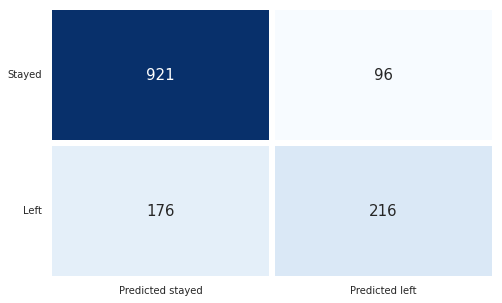

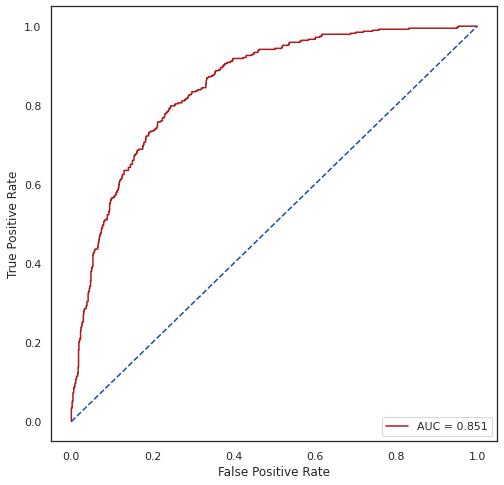


-----------------------------------------------------

Model  Logistic Regression
Data  Over_Sampled_data
              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1017
           1       0.55      0.79      0.65       392

    accuracy                           0.77      1409
   macro avg       0.73      0.77      0.74      1409
weighted avg       0.81      0.77      0.78      1409

ROC AUC Test set score: 0.844
Recall Test set score: 0.79
Precision Test set score: 0.55
f1 Score Test set : 0.65

-----------------------------------------------------

Cross-validation scores with 7 folds:

ROC AUC: 0.858
Recall: 0.81
Precision: 0.75
f1: 0.78


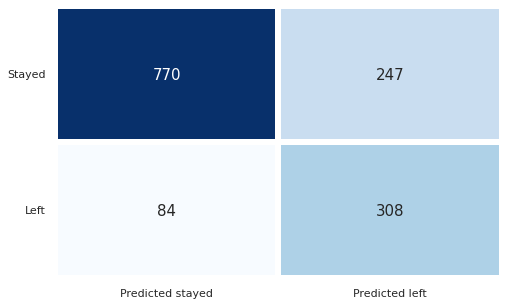

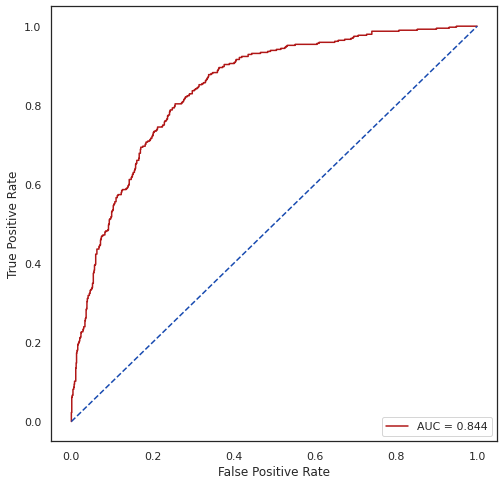


-----------------------------------------------------

Model  Logistic Regression
Data  Under_Sampled_data
              precision    recall  f1-score   support

           0       0.88      0.66      0.76      1017
           1       0.46      0.76      0.58       392

    accuracy                           0.69      1409
   macro avg       0.67      0.71      0.67      1409
weighted avg       0.76      0.69      0.71      1409

ROC AUC Test set score: 0.771
Recall Test set score: 0.76
Precision Test set score: 0.46
f1 Score Test set : 0.58

-----------------------------------------------------

Cross-validation scores with 7 folds:

ROC AUC: 0.736
Recall: 0.76
Precision: 0.64
f1: 0.69


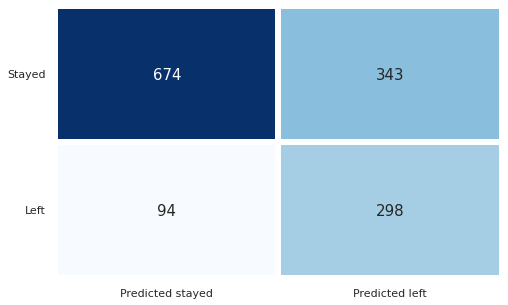

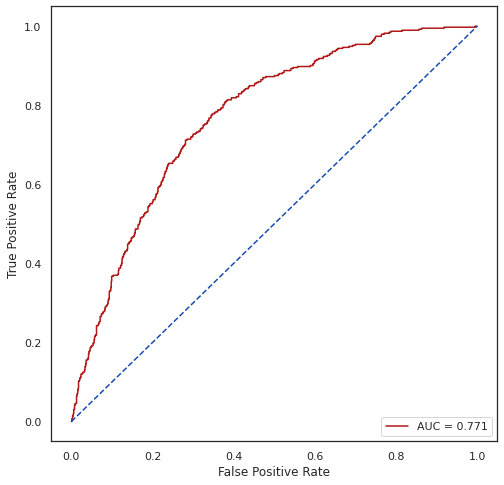


-----------------------------------------------------

Model  Random Forest
Data  Imbalanced data
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1017
           1       0.66      0.46      0.54       392

    accuracy                           0.78      1409
   macro avg       0.74      0.68      0.70      1409
weighted avg       0.77      0.78      0.77      1409

ROC AUC Test set score: 0.83
Recall Test set score: 0.46
Precision Test set score: 0.66
f1 Score Test set : 0.54

-----------------------------------------------------

Cross-validation scores with 7 folds:

ROC AUC: 0.815
Recall: 0.48
Precision: 0.63
f1: 0.54


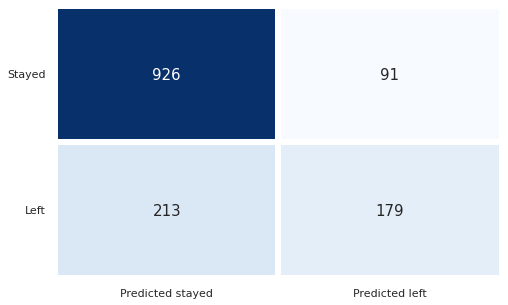

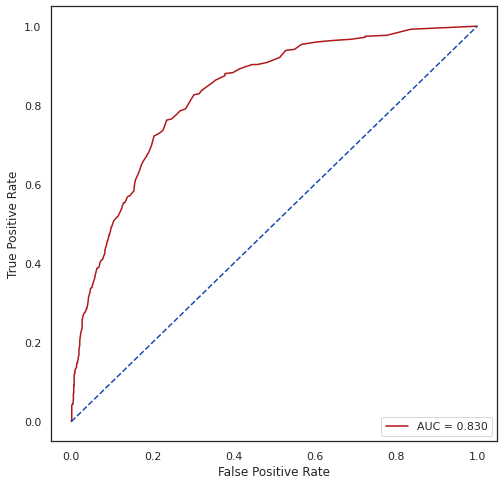


-----------------------------------------------------

Model  Random Forest
Data  Over_Sampled_data
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1017
           1       0.60      0.61      0.60       392

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409

ROC AUC Test set score: 0.819
Recall Test set score: 0.61
Precision Test set score: 0.6
f1 Score Test set : 0.6

-----------------------------------------------------

Cross-validation scores with 7 folds:

ROC AUC: 0.918
Recall: 0.87
Precision: 0.82
f1: 0.84


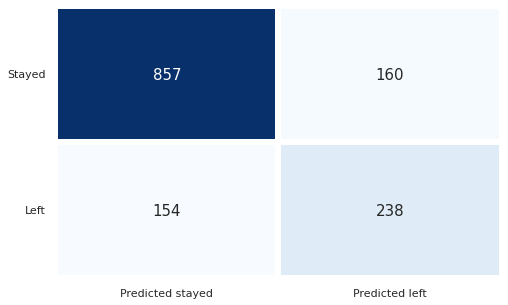

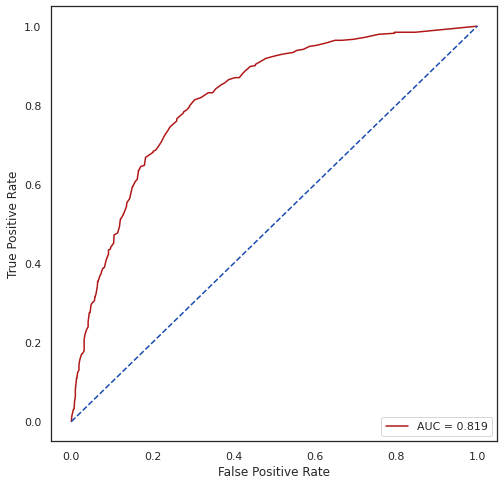


-----------------------------------------------------

Model  Random Forest
Data  Under_Sampled_data
              precision    recall  f1-score   support

           0       0.79      0.46      0.58      1017
           1       0.33      0.68      0.44       392

    accuracy                           0.52      1409
   macro avg       0.56      0.57      0.51      1409
weighted avg       0.66      0.52      0.54      1409

ROC AUC Test set score: 0.596
Recall Test set score: 0.68
Precision Test set score: 0.33
f1 Score Test set : 0.44

-----------------------------------------------------

Cross-validation scores with 7 folds:

ROC AUC: 0.718
Recall: 0.68
Precision: 0.65
f1: 0.66


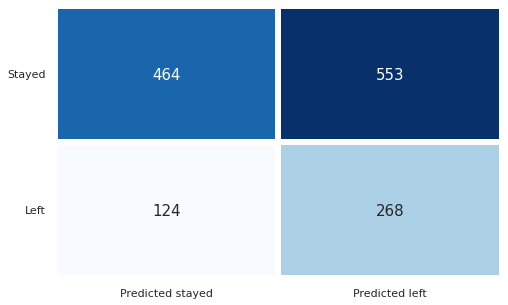

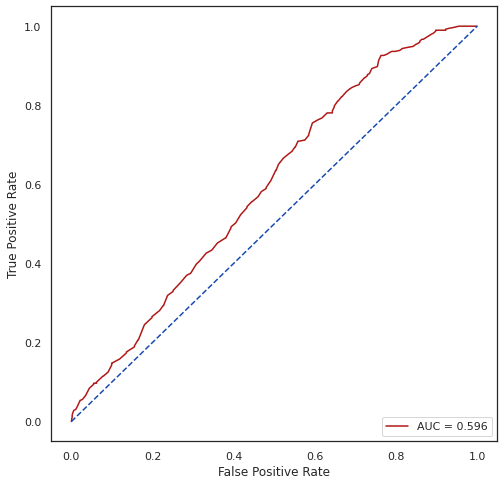


-----------------------------------------------------

Model  LGBM
Data  Imbalanced data
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1017
           1       0.67      0.49      0.57       392

    accuracy                           0.79      1409
   macro avg       0.75      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409

ROC AUC Test set score: 0.844
Recall Test set score: 0.49
Precision Test set score: 0.67
f1 Score Test set : 0.57

-----------------------------------------------------

Cross-validation scores with 7 folds:

ROC AUC: 0.831
Recall: 0.51
Precision: 0.63
f1: 0.56


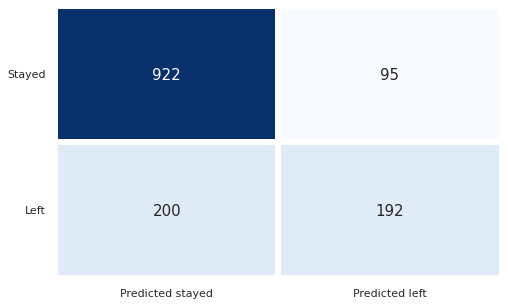

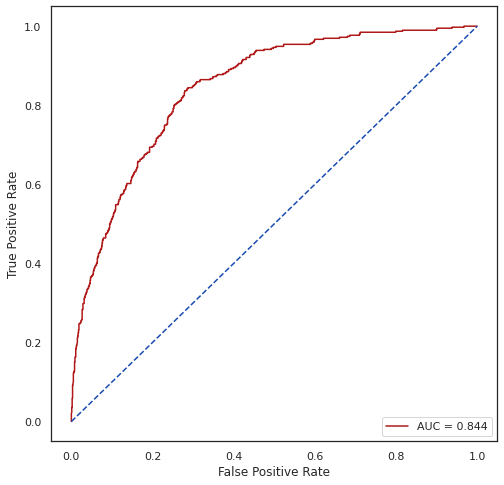


-----------------------------------------------------

Model  LGBM
Data  Over_Sampled_data
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1017
           1       0.59      0.68      0.63       392

    accuracy                           0.78      1409
   macro avg       0.73      0.75      0.74      1409
weighted avg       0.79      0.78      0.78      1409

ROC AUC Test set score: 0.84
Recall Test set score: 0.68
Precision Test set score: 0.59
f1 Score Test set : 0.63

-----------------------------------------------------

Cross-validation scores with 7 folds:

ROC AUC: 0.91
Recall: 0.86
Precision: 0.8
f1: 0.83


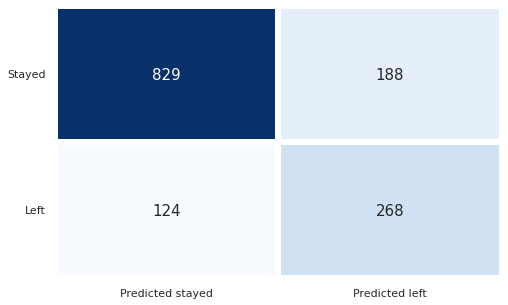

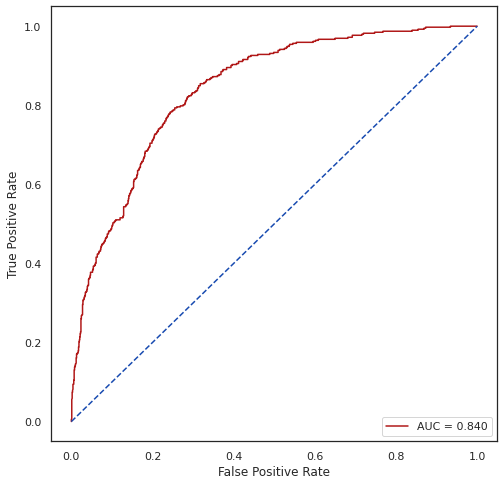


-----------------------------------------------------

Model  LGBM
Data  Under_Sampled_data
              precision    recall  f1-score   support

           0       0.79      0.41      0.54      1017
           1       0.32      0.71      0.44       392

    accuracy                           0.50      1409
   macro avg       0.55      0.56      0.49      1409
weighted avg       0.66      0.50      0.51      1409

ROC AUC Test set score: 0.543
Recall Test set score: 0.71
Precision Test set score: 0.32
f1 Score Test set : 0.44

-----------------------------------------------------

Cross-validation scores with 7 folds:

ROC AUC: 0.745
Recall: 0.69
Precision: 0.67
f1: 0.68


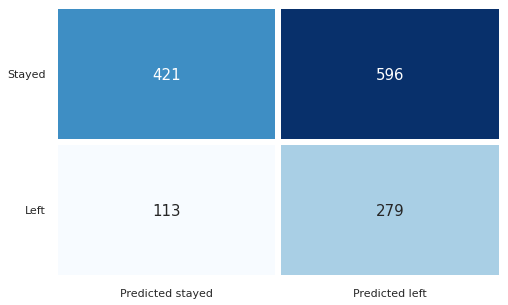

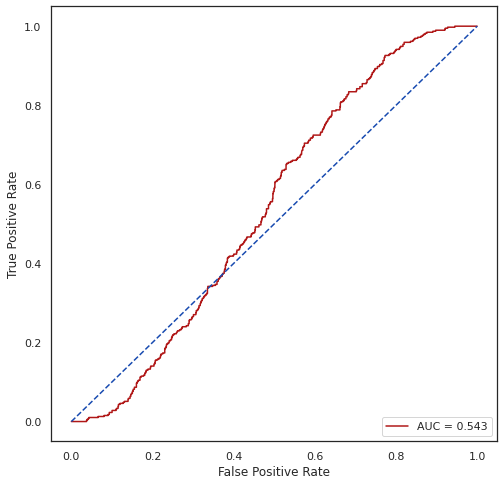


-----------------------------------------------------

Model  XGB
Data  Imbalanced data
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1017
           1       0.68      0.51      0.59       392

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409

ROC AUC Test set score: 0.854
Recall Test set score: 0.51
Precision Test set score: 0.68
f1 Score Test set : 0.59

-----------------------------------------------------

Cross-validation scores with 7 folds:

ROC AUC: 0.844
Recall: 0.51
Precision: 0.66
f1: 0.58


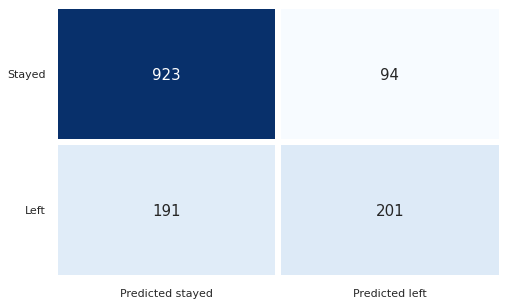

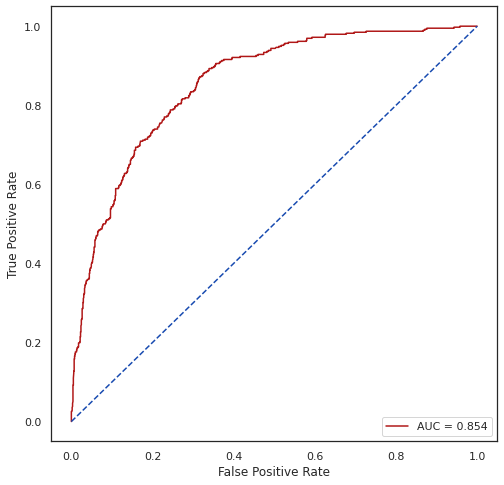


-----------------------------------------------------

Model  XGB
Data  Over_Sampled_data
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1017
           1       0.55      0.77      0.64       392

    accuracy                           0.76      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.76      0.77      1409

ROC AUC Test set score: 0.845
Recall Test set score: 0.77
Precision Test set score: 0.55
f1 Score Test set : 0.64

-----------------------------------------------------

Cross-validation scores with 7 folds:

ROC AUC: 0.883
Recall: 0.86
Precision: 0.77
f1: 0.81


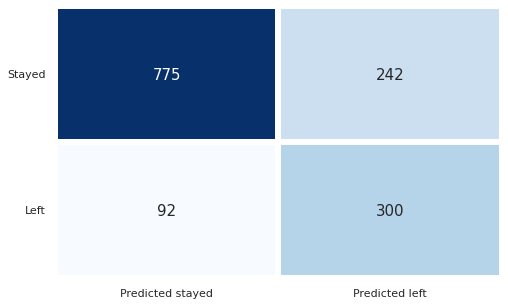

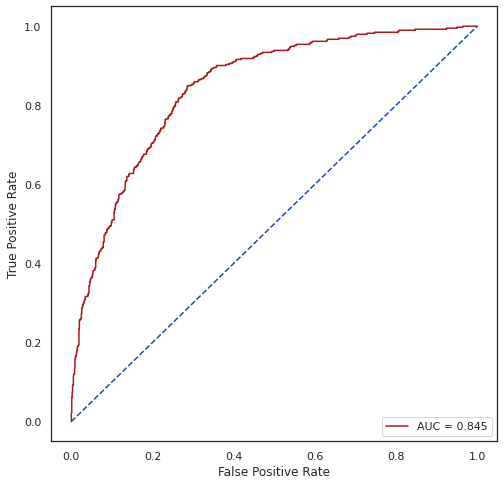


-----------------------------------------------------

Model  XGB
Data  Under_Sampled_data
              precision    recall  f1-score   support

           0       0.84      0.44      0.58      1017
           1       0.35      0.78      0.48       392

    accuracy                           0.53      1409
   macro avg       0.59      0.61      0.53      1409
weighted avg       0.70      0.53      0.55      1409

ROC AUC Test set score: 0.616
Recall Test set score: 0.78
Precision Test set score: 0.35
f1 Score Test set : 0.48

-----------------------------------------------------

Cross-validation scores with 7 folds:

ROC AUC: 0.759
Recall: 0.75
Precision: 0.66
f1: 0.7


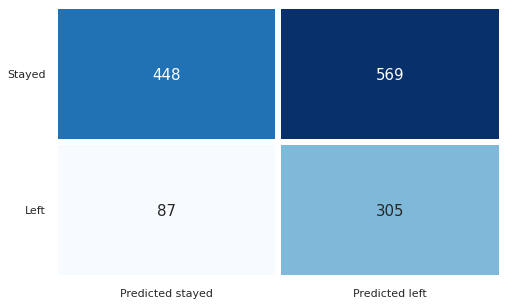

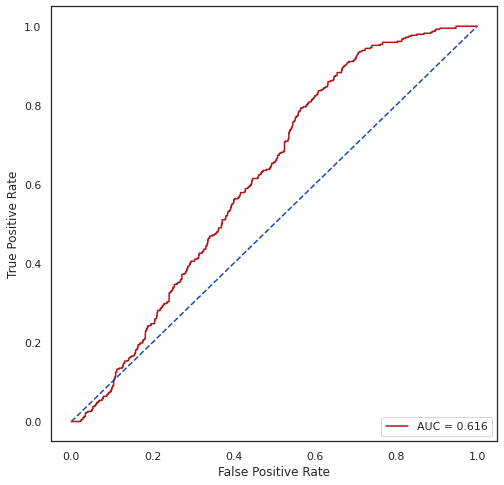


-----------------------------------------------------



In [ ]:

result = []
for model_name, model_clf in models.items():
    for data_type, training_data in data.items():
        result.append(Evaluate_Model(model_name,model_clf,data_type,training_data[0],training_data[1],X_test,y_test))

In [ ]:
Output = pd.DataFrame(result, columns = ['Model', 'Data', 'Training Time','AUC Test', 'Recall Test', 'Precision Test', 'f1 Score test', 'AUC CV Train','Recall CV Train','Precision CV Train', 'f1 CV Train'])
Output

,Model,Data,Training Time,AUC Test,Recall Test,Precision Test,f1 Score test,AUC CV Train,Recall CV Train,Precision CV Train,f1 CV Train
0,Logistic Regression,Imbalanced data,0.057224,0.851,0.55,0.69,0.61,0.840,0.53,0.65,0.58
1,Logistic Regression,Over_Sampled_data,0.069802,0.844,0.79,0.55,0.65,0.858,0.81,0.75,0.78
2,Logistic Regression,Under_Sampled_data,0.034842,0.771,0.76,0.46,0.58,0.736,0.76,0.64,0.69
3,Random Forest,Imbalanced data,0.587263,0.830,0.46,0.66,0.54,0.815,0.48,0.63,0.54
4,Random Forest,Over_Sampled_data,0.854335,0.819,0.61,0.60,0.60,0.918,0.87,0.82,0.84
5,Random Forest,Under_Sampled_data,0.399904,0.596,0.68,0.33,0.44,0.718,0.68,0.65,0.66
6,LGBM,Imbalanced data,0.176024,0.844,0.49,0.67,0.57,0.831,0.51,0.63,0.56
7,LGBM,Over_Sampled_data,0.208979,0.840,0.68,0.59,0.63,0.910,0.86,0.80,0.83
8,LGBM,Under_Sampled_data,0.124577,0.543,0.71,0.32,0.44,0.745,0.69,0.67,0.68
9,XGB,Imbalanced data,0.470788,0.854,0.51,0.68,0.59,0.844,0.51,0.66,0.58


## Hyperparameter Tuning
### 1. Logistic Regression

In [ ]:
model = LogisticRegression(random_state = 10)
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
#space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = [100, 10, 1.0, 0.1, 0.01]
cv = RepeatedKFold(n_splits=7, n_repeats=2, random_state=1)
# define search
search = RandomizedSearchCV(model, space, n_iter=500, scoring='recall', n_jobs=-1, cv=cv, random_state=1)
# execute search
result = search.fit(X_train_OverSampled, y_train_OverSampled)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
means = result.cv_results_['mean_test_score']
stds = result.cv_results_['std_test_score']
params = result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best Score: 0.8162760152196004
Best Hyperparameters: {'solver': 'newton-cg', 'C': 0.01}
0.814503 (0.011740) with: {'solver': 'newton-cg', 'C': 100}
0.814503 (0.011740) with: {'solver': 'lbfgs', 'C': 100}
0.814503 (0.011740) with: {'solver': 'liblinear', 'C': 100}
0.814503 (0.011740) with: {'solver': 'newton-cg', 'C': 10}
0.814503 (0.011740) with: {'solver': 'lbfgs', 'C': 10}
0.814503 (0.011740) with: {'solver': 'liblinear', 'C': 10}
0.814738 (0.011911) with: {'solver': 'newton-cg', 'C': 1.0}
0.814738 (0.011911) with: {'solver': 'lbfgs', 'C': 1.0}
0.814135 (0.010983) with: {'solver': 'liblinear', 'C': 1.0}
0.814138 (0.011317) with: {'solver': 'newton-cg', 'C': 0.1}
0.814138 (0.011317) with: {'solver': 'lbfgs', 'C': 0.1}
0.811384 (0.008821) with: {'solver': 'liblinear', 'C': 0.1}
0.816276 (0.010564) with: {'solver': 'newton-cg', 'C': 0.01}
0.816276 (0.010564) with: {'solver': 'lbfgs', 'C': 0.01}
0.805527 (0.009329) with: {'solver': 'liblinear', 'C': 0.01}


**2. Random Forest**

In [ ]:
# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
max_depth = [5,8,12]
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features,max_depth=max_depth)
cv = RepeatedStratifiedKFold(n_splits=7, n_repeats=2, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='recall',error_score=0)
grid_result = grid_search.fit(X_train_OverSampled, y_train_OverSampled)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.887417 using {'max_depth': 12, 'max_features': 'log2', 'n_estimators': 1000}
0.838585 (0.017698) with: {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 10}
0.846647 (0.017396) with: {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 100}
0.849774 (0.015701) with: {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 1000}
0.841113 (0.020125) with: {'max_depth': 5, 'max_features': 'log2', 'n_estimators': 10}
0.848691 (0.014125) with: {'max_depth': 5, 'max_features': 'log2', 'n_estimators': 100}
0.850736 (0.013960) with: {'max_depth': 5, 'max_features': 'log2', 'n_estimators': 1000}
0.859034 (0.012944) with: {'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 10}
0.867934 (0.010878) with: {'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 100}
0.867692 (0.011496) with: {'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 1000}
0.856627 (0.010540) with: {'max_depth': 8, 'max_features': 'log2', 'n_estimators': 10}
0.867090 (0.010195) with: {'max_dept

**3.Light GBM (LGBM)**

In [ ]:
# define models and parameters
model = LGBMClassifier(random_state = 7)
num_leaves = [2,3,5]
max_depth = [2,3,5]
# define grid search
grid = dict(num_leaves=num_leaves,max_depth=max_depth)
cv = RepeatedStratifiedKFold(n_splits=7, n_repeats=2, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='recall',error_score=0)
grid_result = grid_search.fit(X_train_OverSampled, y_train_OverSampled)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.855665 using {'max_depth': 2, 'num_leaves': 2}
0.855665 (0.010824) with: {'max_depth': 2, 'num_leaves': 2}
0.839668 (0.010594) with: {'max_depth': 2, 'num_leaves': 3}
0.844480 (0.013587) with: {'max_depth': 2, 'num_leaves': 5}
0.855665 (0.010824) with: {'max_depth': 3, 'num_leaves': 2}
0.839668 (0.010594) with: {'max_depth': 3, 'num_leaves': 3}
0.845802 (0.011887) with: {'max_depth': 3, 'num_leaves': 5}
0.855665 (0.010824) with: {'max_depth': 5, 'num_leaves': 2}
0.839668 (0.010594) with: {'max_depth': 5, 'num_leaves': 3}
0.846402 (0.012245) with: {'max_depth': 5, 'num_leaves': 5}


**4.XGB Classifier**

In [ ]:

# define models and parameters
model = XGBClassifier(random_state=7, objective = 'binary:logistic', eval_metric = 'logloss' )
max_depth = [2,3,5]
min_child_weight = [1,3]
# define grid search
grid = dict(max_depth=max_depth, min_child_weight= min_child_weight)
cv = RepeatedStratifiedKFold(n_splits=7, n_repeats=2, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='recall',error_score=0)
grid_result = grid_search.fit(X_train_OverSampled, y_train_OverSampled)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.865049 using {'max_depth': 5, 'min_child_weight': 1}
0.845562 (0.011926) with: {'max_depth': 2, 'min_child_weight': 1}
0.846043 (0.012783) with: {'max_depth': 2, 'min_child_weight': 3}
0.853019 (0.012595) with: {'max_depth': 3, 'min_child_weight': 1}
0.854102 (0.010756) with: {'max_depth': 3, 'min_child_weight': 3}
0.865049 (0.010812) with: {'max_depth': 5, 'min_child_weight': 1}
0.864326 (0.008760) with: {'max_depth': 5, 'min_child_weight': 3}


In [ ]:
# Models with tuned hyperparameters
Tuned_models = {
    "Logistic Regression": LogisticRegression(random_state = 10, solver='newton-cg', C = 0.1),
    "Random Forest": RandomForestClassifier(random_state = 22, n_estimators = 1000, max_features='log2', max_depth = 12),
    "LGBM" : LGBMClassifier(random_state = 7, max_depth = 3, num_leaves = 5),
    "XGB" : XGBClassifier(random_state = 7, max_depth = 5,min_child_weight=3, objective = 'binary:logistic', eval_metric = 'logloss')
}



Model  Logistic Regression
Data  Oversampled Data
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1017
           1       0.55      0.79      0.65       392

    accuracy                           0.76      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.80      0.76      0.77      1409

ROC AUC Test set score: 0.844
Recall Test set score: 0.79
Precision Test set score: 0.55
f1 Score Test set : 0.65

-----------------------------------------------------

Cross-validation scores with 7 folds:

ROC AUC: 0.858
Recall: 0.81
Precision: 0.75
f1: 0.78


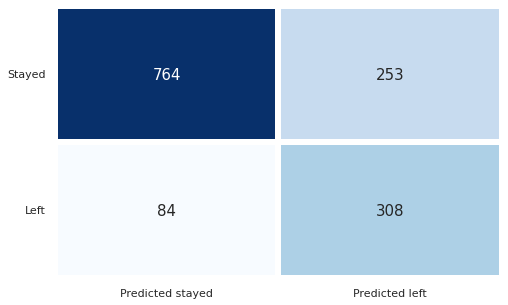

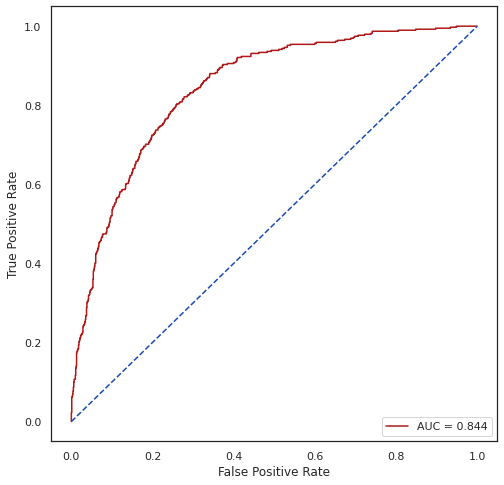


-----------------------------------------------------

Model  Random Forest
Data  Oversampled Data
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1017
           1       0.58      0.69      0.63       392

    accuracy                           0.77      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.79      0.77      0.78      1409

ROC AUC Test set score: 0.836
Recall Test set score: 0.69
Precision Test set score: 0.58
f1 Score Test set : 0.63

-----------------------------------------------------

Cross-validation scores with 7 folds:

ROC AUC: 0.912
Recall: 0.88
Precision: 0.8
f1: 0.84


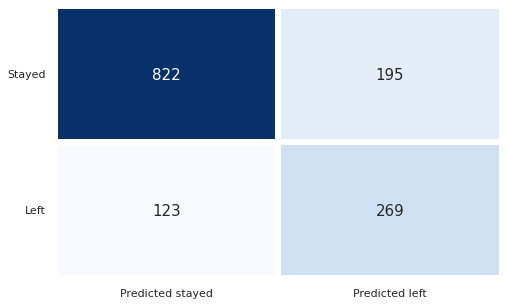

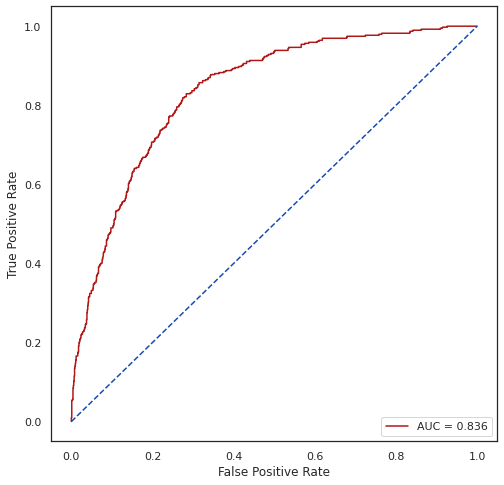


-----------------------------------------------------

Model  LGBM
Data  Oversampled Data
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1017
           1       0.56      0.78      0.66       392

    accuracy                           0.77      1409
   macro avg       0.73      0.77      0.74      1409
weighted avg       0.81      0.77      0.78      1409

ROC AUC Test set score: 0.844
Recall Test set score: 0.78
Precision Test set score: 0.56
f1 Score Test set : 0.66

-----------------------------------------------------

Cross-validation scores with 7 folds:

ROC AUC: 0.879
Recall: 0.85
Precision: 0.77
f1: 0.81


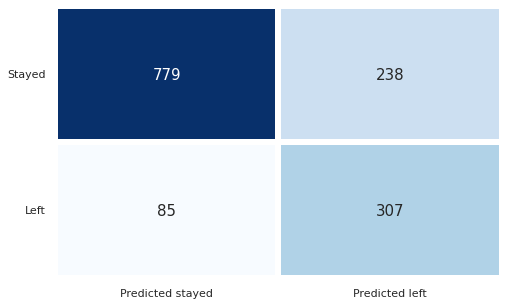

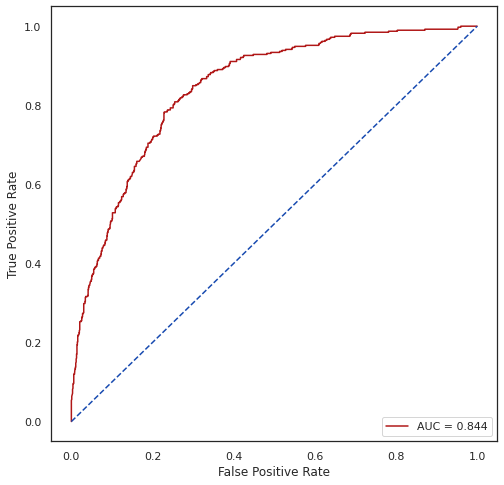


-----------------------------------------------------

Model  XGB
Data  Oversampled Data
              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1017
           1       0.56      0.72      0.63       392

    accuracy                           0.77      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.79      0.77      0.77      1409

ROC AUC Test set score: 0.841
Recall Test set score: 0.72
Precision Test set score: 0.56
f1 Score Test set : 0.63

-----------------------------------------------------

Cross-validation scores with 7 folds:

ROC AUC: 0.898
Recall: 0.86
Precision: 0.79
f1: 0.82


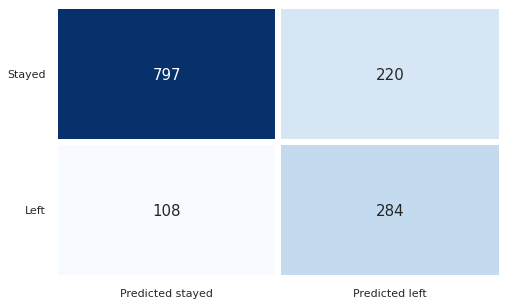

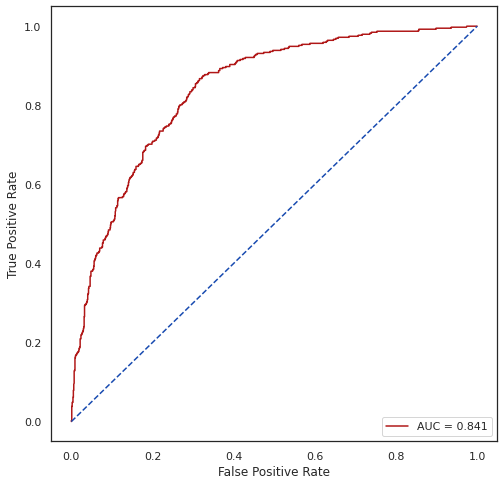


-----------------------------------------------------



In [ ]:
Tuned_result = []
for model_name, model_clf in Tuned_models.items():
    Tuned_result.append(Evaluate_Model(model_name,model_clf,"Oversampled Data",X_train_OverSampled,y_train_OverSampled,X_test,y_test))
    

**Hyperparameter Tuned Models** **Output**

In [ ]:
Tuned_Output = pd.DataFrame(Tuned_result, columns = ['Model', 'Data','Training Time', 'AUC Test', 'Recall Test', 'Precision Test', 'f1 Score test', 'AUC CV Train','Recall CV Train','Precision CV Train', 'f1 CV Train'])
Tuned_Output

,Model,Data,Training Time,AUC Test,Recall Test,Precision Test,f1 Score test,AUC CV Train,Recall CV Train,Precision CV Train,f1 CV Train
0,Logistic Regression,Oversampled Data,0.107363,0.857,0.80,0.55,0.65,0.856,0.81,0.75,0.78
1,Random Forest,Oversampled Data,7.550244,0.849,0.70,0.57,0.63,0.906,0.88,0.80,0.84
2,LGBM,Oversampled Data,0.138438,0.861,0.80,0.55,0.65,0.875,0.84,0.77,0.80
3,XGB,Oversampled Data,0.773670,0.857,0.73,0.55,0.63,0.890,0.85,0.79,0.82


**Feature Importance of Best Model** **LGBM**

In [ ]:
model= LGBMClassifier(random_state = 7, max_depth = 3, num_leaves = 5)
model = model.fit(X_train_OverSampled,y_train_OverSampled)
FeatureImportance(model, X_train_OverSampled)

             feature  importance
4             tenure         128
17    MonthlyCharges          76
14          Contract          39
16     PaymentMethod          27
3         Dependents          19
5       PhoneService          17
11       TechSupport          15
6      MultipleLines          14
8     OnlineSecurity          13
0             gender          12
15  PaperlessBilling           8
1      SeniorCitizen           7
9       OnlineBackup           7
13   StreamingMovies           6
7    InternetService           6
2            Partner           6
10  DeviceProtection           0
12       StreamingTV           0
